C:\Users\eera\AppData\Local\Temp\ipykernel_16968\3988423672.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


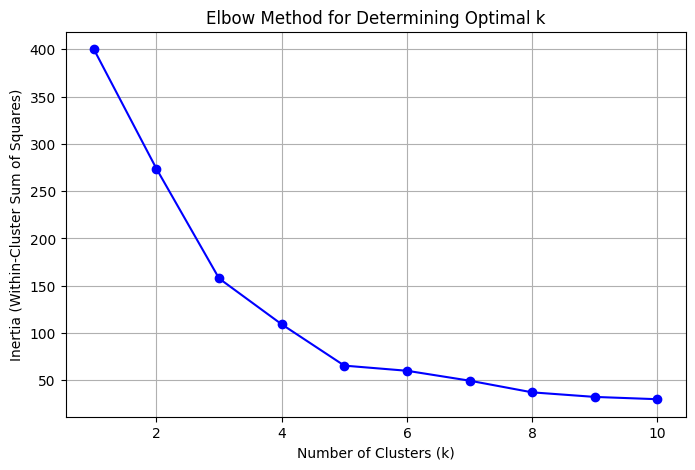

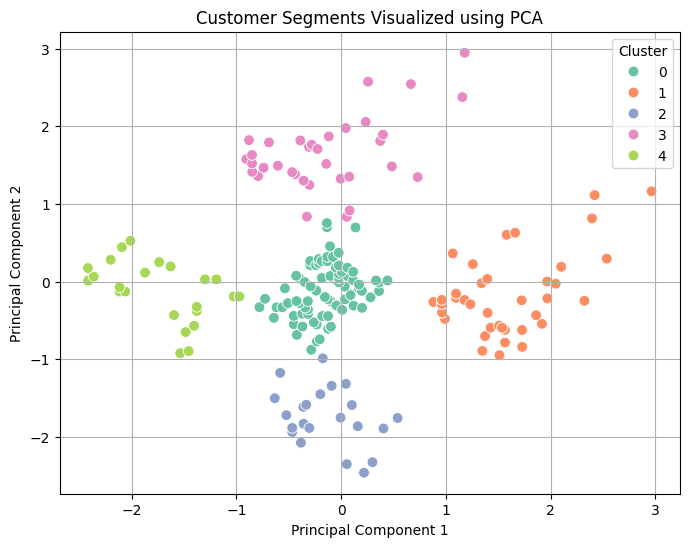

Silhouette Score: 0.5547


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display basic info
print(df.info())
print(df.head())

# 2. Select relevant numerical features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Optional: Reduce dimensions using PCA (for 2D visualization)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# 3. Apply initial KMeans (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to original DataFrame
df['Cluster'] = cluster_labels

# 4. Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Determining Optimal k')
plt.grid(True)
plt.show()

# 5. Visualize Clusters (2D using PCA)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=cluster_labels, 
    palette='Set2', 
    s=60
)
plt.title("Customer Segments Visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# 6. Evaluate Clustering using Silhouette Score
sil_score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")
